<a href="https://colab.research.google.com/github/avsujit/.netCoreGraphQL/blob/master/assign1_adabala_b00976895.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import math
import numpy as np
from scipy.special import gamma
from scipy.integrate import quad
import matplotlib.pyplot as plt


# Part 1

In [16]:
#Numberical inversion using binary search
class n_inversion:
  def __init__(self,f_x,y,d):
    self.f_x = f_x
    self.y = y
    self.d = d
  def binary_search(self):
    low = 0
    high = self.y
    if self.d is not None:
      low = self.d[0]
      high = self.d[1]
    while(low != high and low < high):
      mid = float(format((low+high)/2,".2f"))
      # print(low, " ", high, " ", mid, "\n")
      if self.f_x(low) == self.y:
        return low
      if self.f_x(high) == self.y:
       return high

      if self.f_x(mid) == self.y:
        return mid
      if self.f_x(mid) > self.y:
        high = float(format(mid - 0.01,".2f"))
      else:
        low = float(format(mid + 0.01,".2f"))
    if self.f_x(low) == self.y:
      return low
    return -1
  def compute(self):
    return self.binary_search()


In [17]:
#Basic Tests for binary search function
def square_function(x):
  return x*x

print(n_inversion(square_function,100,None).compute())


10.0


In [18]:
#1.1 Transcedental function
def transcendental_function(x):
  try:
    return float(format((x*(math.exp(x))) + x,".2f"))
  except OverflowError:
    return float('inf')
# #Test cases
tests = [float(format(i,".2f")) for i in np.arange(1,16,.4)]
for x in tests:
  if x == n_inversion(transcendental_function,transcendental_function(x),None).compute():
    print("test passed for x = ",x)
  else:
    print("test failed for x = ",x)



test passed for x =  1.0
test passed for x =  1.4
test passed for x =  1.8
test passed for x =  2.2
test passed for x =  2.6
test passed for x =  3.0
test passed for x =  3.4
test passed for x =  3.8
test passed for x =  4.2
test passed for x =  4.6
test passed for x =  5.0
test passed for x =  5.4
test passed for x =  5.8
test passed for x =  6.2
test passed for x =  6.6
test passed for x =  7.0
test passed for x =  7.4
test passed for x =  7.8
test passed for x =  8.2
test passed for x =  8.6
test passed for x =  9.0
test passed for x =  9.4
test passed for x =  9.8
test passed for x =  10.2
test passed for x =  10.6
test passed for x =  11.0
test passed for x =  11.4
test passed for x =  11.8
test passed for x =  12.2
test passed for x =  12.6
test passed for x =  13.0
test passed for x =  13.4
test passed for x =  13.8
test passed for x =  14.2
test passed for x =  14.6
test passed for x =  15.0
test passed for x =  15.4
test passed for x =  15.8


In [19]:
#1.2 Gamma Function
def gammaFunction(x):
  return gamma(x)

tests = [float(format(i,".2f")) for i in np.arange(1.5,16,.4)]
for x in tests:
  if x == n_inversion(gammaFunction,gammaFunction(x),(1.5,16)).compute():
    print("test passed for x = ",x)
  else:
    print("test failed for x = ",x)


test passed for x =  1.5
test passed for x =  1.9
test passed for x =  2.3
test passed for x =  2.7
test passed for x =  3.1
test passed for x =  3.5
test passed for x =  3.9
test passed for x =  4.3
test passed for x =  4.7
test passed for x =  5.1
test passed for x =  5.5
test passed for x =  5.9
test passed for x =  6.3
test passed for x =  6.7
test passed for x =  7.1
test passed for x =  7.5
test passed for x =  7.9
test passed for x =  8.3
test passed for x =  8.7
test passed for x =  9.1
test passed for x =  9.5
test passed for x =  9.9
test passed for x =  10.3
test passed for x =  10.7
test passed for x =  11.1
test passed for x =  11.5
test passed for x =  11.9
test passed for x =  12.3
test passed for x =  12.7
test passed for x =  13.1
test passed for x =  13.5
test passed for x =  13.9
test passed for x =  14.3
test passed for x =  14.7
test passed for x =  15.1
test passed for x =  15.5
test passed for x =  15.9


# Part 2

In [20]:
def c_def_integral(f_x,a,b):
  res, err = quad(f_x, a,b)
  print("The numerical result is {:f} (+-{:g})"
    .format(res, err))
  return res

def f(x):
  if x == 0:
    return 1
  return math.sin(x)/x
print(c_def_integral(f,-1,1))

The numerical result is 1.892166 (+-2.10073e-14)
1.892166140734366


# Part 3

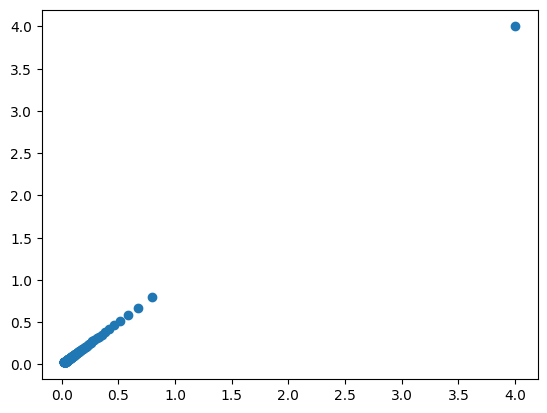

In [21]:
#Gradient descent optimiser
def opt(grad,start,step):
  r_v = []
  noOfSteps=10
  i_p = start
  g_v = (0,0)
  while True:
    n_g_v = grad(i_p)
    n_i_p = (i_p[0] -  step * n_g_v[0], i_p[1] -  step *n_g_v[1])
    r_v.append(i_p)
    i_p = n_i_p
    # gradient_magnitude = np.linalg.norm(n_g_v)
    # if gradient_magnitude < 1e-6:
    #         return r_v
    if abs(n_g_v[0]-g_v[0]) < 0.00001:
      return r_v
    g_v = n_g_v

def g(x):
  return (2 * x[0]*x[1],2 * x[0]*x[1])


args = opt(g,(4,4),0.1)
plt.scatter([x[0] for x in args],[x[1] for x in args])
plt.show()


In [22]:
#3.1 THCF
def thcf(p):
    return (2*p[0]**2) - (1.05*p[0]**4) + ((p[0]**6)/6) + (p[0] * p[1]) + (p[1]**2)

def thcf_grad(p):
  # print("calculating grad at ", p)
  x1 = (4*p[0]) - (4.2*(p[0]**3)) + (p[0]**5) + p[1]
  x2 =  p[0] + 2*p[1]
  # print("computed gradient is ",(x1,x2))
  return( x1 ,x2)

In [23]:
#Test gradient wrapper
def check_grad(func, grad_func, num_checks=10, epsilon=1e-6, domain=(-5,5)):
    for _ in range(num_checks):
        x = np.random.uniform(*domain)  # Random x within the domain
        y = np.random.uniform(*domain)  # Random y within the domain
        point = (x,y)

        n_grad = np.zeros(2)
        for i in range(2):
            p_point = list(point)
            p_point[i] += epsilon
            n_grad[i] = (func(p_point) - func(point)) / epsilon

        a_grad = np.array(grad_func(point))
        assert np.allclose(n_grad, a_grad, atol=0.01), \
            f"Gradient check failed at point {point}. Numerical gradient: {n_grad}, Analytical gradient: {a_grad}"

In [24]:
# test thcf_grad
check_grad(thcf,thcf_grad)

In [25]:
np.random.seed(0)
def compute_global_minima(no_of_trails=10):
  prev_min = (float("inf"), float("inf"))
  min_point= (np.nan,np.nan)
  for i in range(no_of_trails):
    cur_point = (np.random.uniform(-5,5), np.random.uniform(-5,5))
    print("running trial :",i," with point :",cur_point)
    resp = opt(thcf_grad,cur_point,0.001)
    if resp[-1][0] < prev_min[0]:
      prev_min = resp[-1]
      min_point = cur_point
  return min_point

In [26]:
point_thcp = compute_global_minima()
print("global minima point is :",point_thcp)

running trial : 0  with point : (0.48813503927324753, 2.151893663724195)
running trial : 1  with point : (1.027633760716439, 0.4488318299689684)
running trial : 2  with point : (-0.7634520066109527, 1.4589411306665614)
running trial : 3  with point : (-0.6241278873730751, 3.917730007820797)
running trial : 4  with point : (4.636627605010293, -1.1655848117422227)
running trial : 5  with point : (2.917250380826646, 0.28894919752904435)
running trial : 6  with point : (0.6804456109393229, 4.25596638292661)
running trial : 7  with point : (-4.289639418021131, -4.1287070029845925)
running trial : 8  with point : (-4.797816025596743, 3.32619845547938)
running trial : 9  with point : (2.7815675094985046, 3.700121482468191)
global minima point is : (-0.6241278873730751, 3.917730007820797)


In [27]:
path = opt(thcf_grad,point_thcp,0.01)
print(path)
x = np.linspace(-5, 5, len(path))
y = np.linspace(-5, 5, len(path))
x = [p[0] for p in path]
y=  [p[1] for p in path]
Z = [thcf((p[0],p[1])) for p in path]
print(Z)


[(-0.6241278873730751, 3.917730007820797), (-0.6476040746127882, 3.845616686538112), (-0.6704241876620529, 3.7751803935534776), (-0.692660673481803, 3.7063810275590283), (-0.7143812414417356, 3.6391800137426658), (-0.7356494682447089, 3.5735402258822297), (-0.7565253445056094, 3.5094259160470322), (-0.7770657672585467, 3.4468026511711476), (-0.7973249825798022, 3.3856372558203103), (-0.8173549821295067, 3.325897760529702), (-0.8372058568228183, 3.2675533551404032), (-0.8569261100951662, 3.2105743466058234), (-0.8765629323535512, 3.154932120774659), (-0.8961624372157407, 3.1005991076827013), (-0.9157698590266309, 3.0475487499012046), (-0.9354297098915296, 2.9957554734934466), (-0.9551858930585757, 2.945194661122493), (-0.9750817678925946, 2.8958426268306288), (-0.9951601598864971, 2.847676591972942), (-1.0154633071354757, 2.8006746617323484), (-1.0360327324481315, 2.7548158015690563), (-1.0569090278048776, 2.7100798128621566), (-1.0781315352532892, 2.6664473068829624), (-1.0997379056673

In [28]:
#3.2 Shubert
def sf(p):
  left = 0
  right = 0
  for i in range(1,6):
    left+= i * (math.cos(((i+1)*p[0]) + i))
  for i in range(1,6):
    right+= i * (math.cos(((i+1)*p[1]) + i))
  return left*right

def sf_grad(p):
  left = 0
  right = 0
  for i in range(1,6):
    left+= i * (math.cos(((i+1)*p[0]) + i))
  for i in range(1,6):
    right+= i * (math.cos(((i+1)*p[1]) + i))
  left_d = 0
  right_d = 0
  for i in range(1,6):
    left_d+= - i * (math.sin(((i+1)*p[0])+i)) *(i+1) * right
  for i in range(1,6):
    right_d+= - i * (math.sin(((i+1)*p[1]) + i)) * (i+1) * left
  return left_d , right_d


In [29]:
#Test schubert grad function
check_grad(sf, sf_grad, num_checks=10,domain=(-10,10))

In [30]:
np.random.seed(0)
def compute_global_minima_sf(no_of_trails=1000):
  prev_min = (float("inf"), float("inf"))
  min_point= (np.nan,np.nan)
  for i in range(no_of_trails):
    cur_point = (np.random.uniform(-10,10), np.random.uniform(-10,10))
    print("running trial :",i," with point :",cur_point)
    resp = opt(sf_grad,cur_point,0.001)
    if resp[-1][0] < prev_min[0]:
      prev_min = resp[-1]
      min_point = cur_point
  return min_point

In [31]:
point_sf = compute_global_minima_sf(10)
print("global minima is :",point_sf)

running trial : 0  with point : (0.9762700785464951, 4.30378732744839)
running trial : 1  with point : (2.055267521432878, 0.8976636599379368)
running trial : 2  with point : (-1.5269040132219054, 2.917882261333123)
running trial : 3  with point : (-1.2482557747461502, 7.835460015641594)
running trial : 4  with point : (9.273255210020587, -2.3311696234844455)
running trial : 5  with point : (5.834500761653292, 0.5778983950580887)
running trial : 6  with point : (1.3608912218786458, 8.51193276585322)
running trial : 7  with point : (-8.579278836042262, -8.257414005969185)
running trial : 8  with point : (-9.595632051193485, 6.65239691095876)
running trial : 9  with point : (5.563135018997009, 7.400242964936382)
global minima is : (-9.595632051193485, 6.65239691095876)


In [34]:
path = opt(sf_grad,point_sf,0.001)
print(path)

[(-9.595632051193485, 6.65239691095876), (-9.66316594820549, 6.647658808175717), (-9.712464920481525, 6.637856305225186), (-9.742945900728708, 6.629260431505042), (-9.760135472097943, 6.623837060507638), (-9.769495938037267, 6.620817602859013), (-9.774544517462177, 6.619206408857444), (-9.777262719900824, 6.618358672478802), (-9.778726375418877, 6.617914785867746), (-9.779514783992617, 6.617682776187039), (-9.77993958460164, 6.61756159711636), (-9.780168510560692, 6.617498324906233), (-9.780291891776459, 6.617465292882996), (-9.780358392702052, 6.61744804933535), (-9.780394236982591, 6.617439048088139), (-9.780413557529315, 6.617434349461662), (-9.78042397165817, 6.617431896814249), (-9.78042958509241, 6.617430616557049), (-9.78043261085951, 6.61742994827738), (-9.780434241818277, 6.617429599443463), (-9.78043512094363, 6.617429417356495), (-9.780435594813191, 6.617429322309394), (-9.78043585024026, 6.6174292726960156), (-9.780435987921596, 6.617429246798465), (-9.780436062135156, 6.61

# Part 4

In [35]:
#1)# We can normalise the candidate pdf by finding the definite integral and divide the candidate function by it
#integral sin^2(x) dx = x/2 - 1/4 sin(2 x) + constant = pi/2
#normalised pdf = 2/pi * sin^2(x)

In [36]:
# 2

def pdf_sin2(n):
  samples = []
  for i in range(n):
    while True:
      x = np.random.uniform(0,np.pi)
      a_prob = (2/np.pi) * np.sin(x)**2
      u = np.random.uniform(0,1)
      if u < a_prob:
        samples.append(x)
        break
  return samples

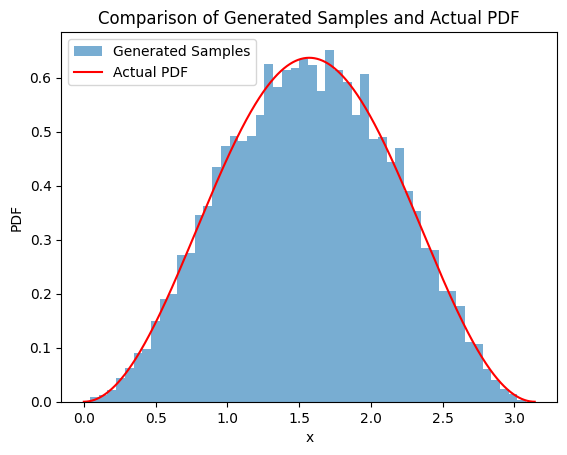

In [38]:
samples = pdf_sin2(10000)
# print(samples)
plt.hist(samples, bins=50, density=True, alpha=0.6, label='Generated Samples')
x = np.linspace(0, np.pi, 1000)
plt.plot(x, (2 / np.pi) * np.sin(x)**2, 'r', label='Actual PDF')
plt.xlabel('x')
plt.ylabel('PDF')
plt.legend()
plt.title('Comparison of Generated Samples and Actual PDF')
plt.show()

4.2 - 1
1- generate a random y using an random angle sampled uniformly in the interval $[0,2pi)$

2- generate random radius x along the radius r non uniformly

3- we can square root over the generated x to correct the distribution as the PDF of r should be proportional to r, which means the CDF of r should be proportional to r^2 - this will compensate and correct the x distribution

In [39]:
#4.2 - 2
def disk_sample(n):
  points = []
  for i in range(n):
      r = math.sqrt(np.random.uniform(0, 1))
      theta = np.random.uniform(0, 2 * math.pi)
      x = r * math.cos(theta)
      y = r * math.sin(theta)
      points.append((x, y))
  return points

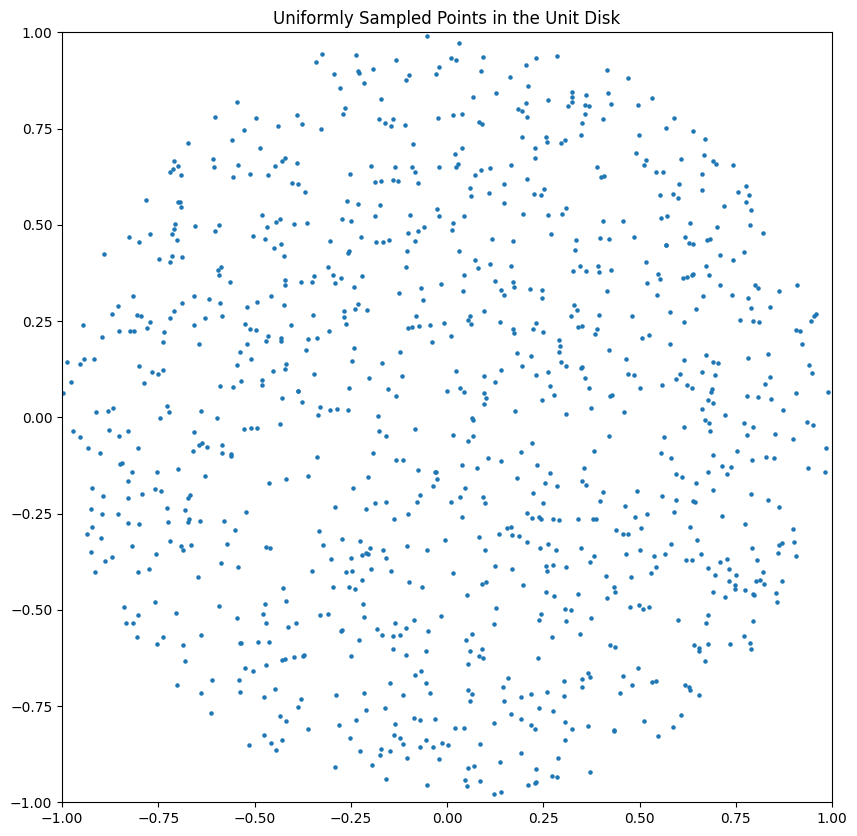

In [41]:
#4.2 - 3#Scatter plot to show distribution
points = disk_sample(1000)
x_coords, y_coords = zip(*points)
plt.figure(figsize=(10, 10))
plt.scatter(x_coords, y_coords, s=5)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Uniformly Sampled Points in the Unit Disk')
plt.show()